### Model Evaluation for binary classification of aliens vs. predators

The CNN models, which were trained in the first notebook, will receive images in shape of (64,63,3) as input.

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import numpy as np

Using TensorFlow backend.


The first model with 97% training accuracy and 85% validation accuracy will be loaded and evaluated.

In [2]:
model = tf.keras.models.load_model('model-97-85.h5')

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(
                            'dataset/train', 
                            target_size=(64,64),
                            batch_size=128, 
                            class_mode='binary')

Found 694 images belonging to 2 classes.


In [4]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_set = validation_datagen.flow_from_directory(
                                    'dataset/validation',
                                    target_size=(64,64),
                                    batch_size=128,
                                    class_mode='binary')

Found 200 images belonging to 2 classes.


In [5]:
train_loss, train_acc = model.evaluate_generator(train_set, verbose=0)
val_loss, val_acc = model.evaluate_generator(validation_set, verbose=0)

In [6]:
print("Training loss: %f" % train_loss)
print("Training accuracy: %f" % train_acc)
print("Validation loss: %f" % val_loss)
print("Validation accuracy: %f" % val_acc)

Training loss: 0.076009
Training accuracy: 0.989914
Validation loss: 0.611499
Validation accuracy: 0.855000


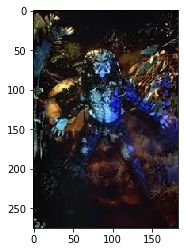

Probability that it is a predator =  0.98


In [7]:
predator = cv2.imread('dataset/validation/predator/1.jpg')
plt.imshow(predator)
plt.show()
predator = cv2.resize(predator, (64,64))
predator = predator.reshape(1,64,64,3) / 255.
y_pred = model.predict(predator)
print("Probability that it is a predator = ", "%.2f" % (y_pred))

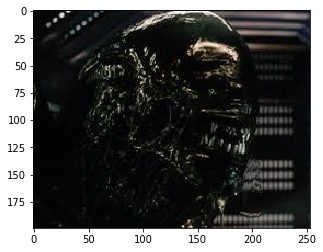

Probability that it is an alien =  0.90


In [12]:
alien = cv2.imread('dataset/validation/alien/4.jpg')
plt.imshow(alien)
plt.show()
alien = cv2.resize(alien, (64,64))
alien = alien.reshape(1,64,64,3) / 255.
y_pred = model.predict(alien)
print("Probability that it is an alien = ", "%.2f" % (1-y_pred))

The second model with 91% training accuracy and 86% validation accuracy will be loaded and evaluated.

In [16]:
model2 = tf.keras.models.load_model('model-91-86.h5')

In [17]:
train_loss, train_acc = model2.evaluate_generator(train_set, verbose=0)
val_loss, val_acc = model2.evaluate_generator(validation_set, verbose=0)

In [18]:
print("Training loss: %f" % train_loss)
print("Training accuracy: %f" % train_acc)
print("Validation loss: %f" % val_loss)
print("Validation accuracy: %f" % val_acc)

Training loss: 0.219322
Training accuracy: 0.940922
Validation loss: 0.441823
Validation accuracy: 0.860000
